# Weather Project - Rain  Precipation between Seattle and Honolulu - Exploratory Data Analysis

## Import Libraries

In [47]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

## Load cleaned data

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/JLichwa80/weather/refs/heads/main/data/seattle_honolulu_rain_clean.csv')

In [49]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,Seattle,0.00,1
1,2018-01-02,Seattle,0.00,2
2,2018-01-03,Seattle,0.00,3
3,2018-01-04,Seattle,0.00,4
4,2018-01-05,Seattle,0.25,5
...,...,...,...,...
3647,2022-12-27,Honolulu,0.00,361
3648,2022-12-28,Honolulu,0.00,362
3649,2022-12-29,Honolulu,0.00,363
3650,2022-12-30,Honolulu,0.00,364


## Analyze the data to compare rain precipitation between Seattle and Honolulu

### Line Plot of Daily Rain Precipitation for Seattle and Honolulu

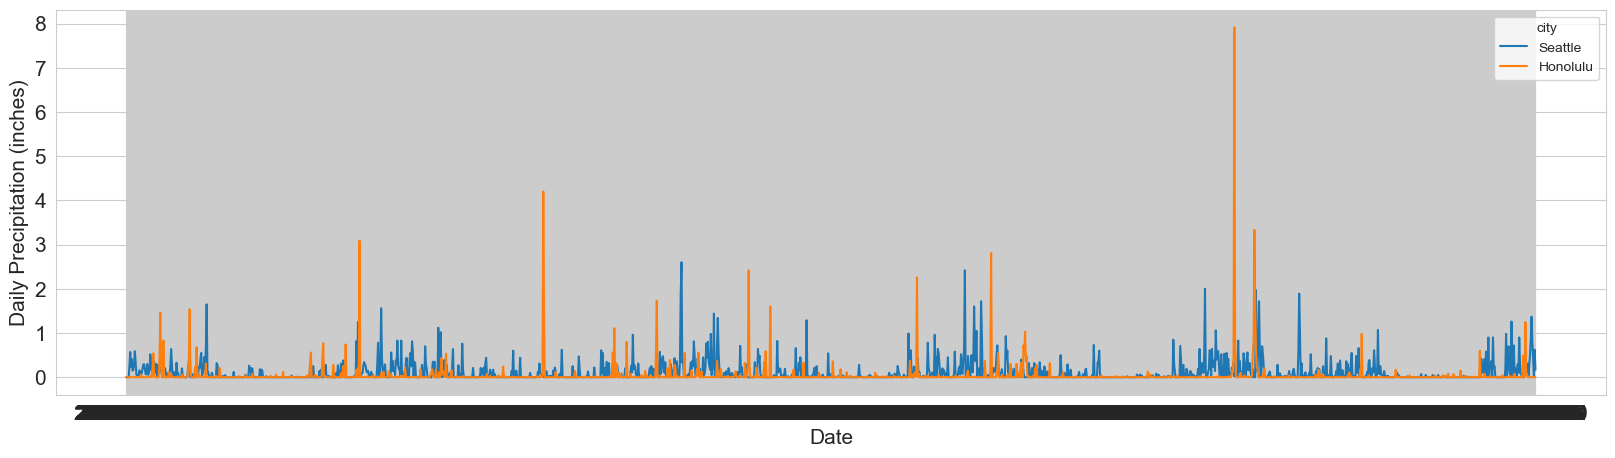

In [50]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='date', y='precipitation', hue='city')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)
plt.show()


From line plot we can see that Honolulu has higher spikes in daily rain precipitation, but Seattle has more volume overall.

In [51]:
#Total precipitation by city
df[['city', 'precipitation']].groupby('city').sum()

,precipitation
city,
Honolulu,80.700000
Seattle,206.831667


### Numerical summary statistics

In [52]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
                 count      mean       std  min  25%   50%   75%   max
city                                                                  
Honolulu        1826.0  0.044195  0.287316  0.0  0.0  0.00  0.00  7.92
Seattle         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

We can see that Honolulu has lower mean, but slightly higher standard deviation. 

### Bar Plot of average daily rain precipitation for Seattle and Honolulu

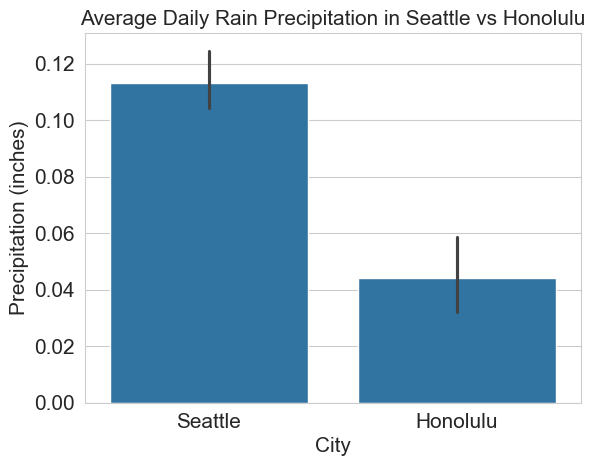

In [53]:
sns.barplot(data=df, x='city', y='precipitation')

plt.ylabel('Precipitation (inches)', fontsize=15)
plt.xlabel('City', fontsize=15)
plt.title('Average Daily Rain Precipitation in Seattle vs Honolulu', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

Seattle shows slightly higher precipitation levels than Honolulu. The black line shows confidence interval, but there is no significant difference between the two cities.

### Periodical rain precipitation trends

In [54]:
#Add month and yeear columns to dataframe
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year
df

,date,city,precipitation,day_of_year,month,year
0,2018-01-01,Seattle,0.00,1,1,2018
1,2018-01-02,Seattle,0.00,2,1,2018
2,2018-01-03,Seattle,0.00,3,1,2018
3,2018-01-04,Seattle,0.00,4,1,2018
4,2018-01-05,Seattle,0.25,5,1,2018
...,...,...,...,...,...,...
3647,2022-12-27,Honolulu,0.00,361,12,2022
3648,2022-12-28,Honolulu,0.00,362,12,2022
3649,2022-12-29,Honolulu,0.00,363,12,2022
3650,2022-12-30,Honolulu,0.00,364,12,2022


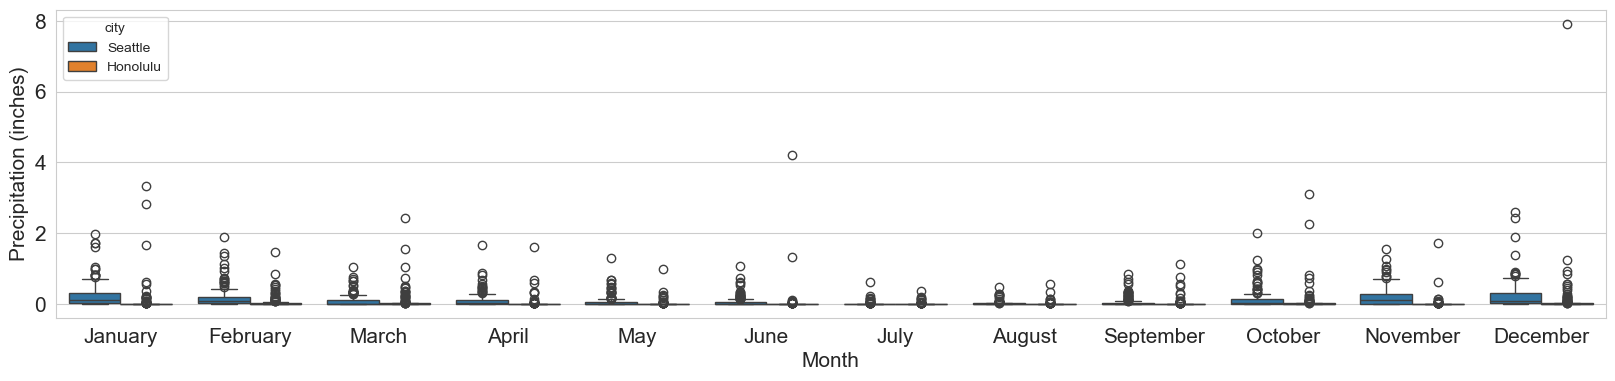

In [59]:
plt.figure(figsize=(20, 4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

import calendar
month_names = list(calendar.month_name)[1:]

plt.xticks(ticks=range(12), labels=month_names)

plt.show()


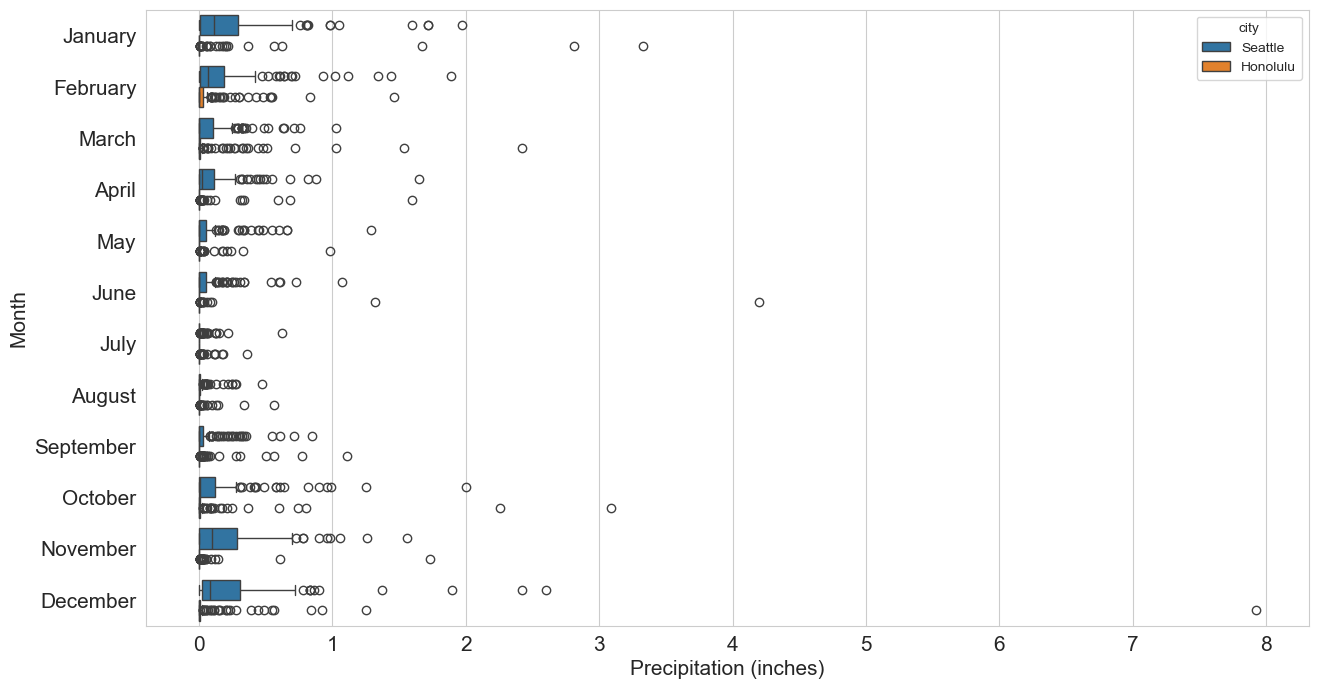

In [60]:
#Horizontal visualization of above boxplot.
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()


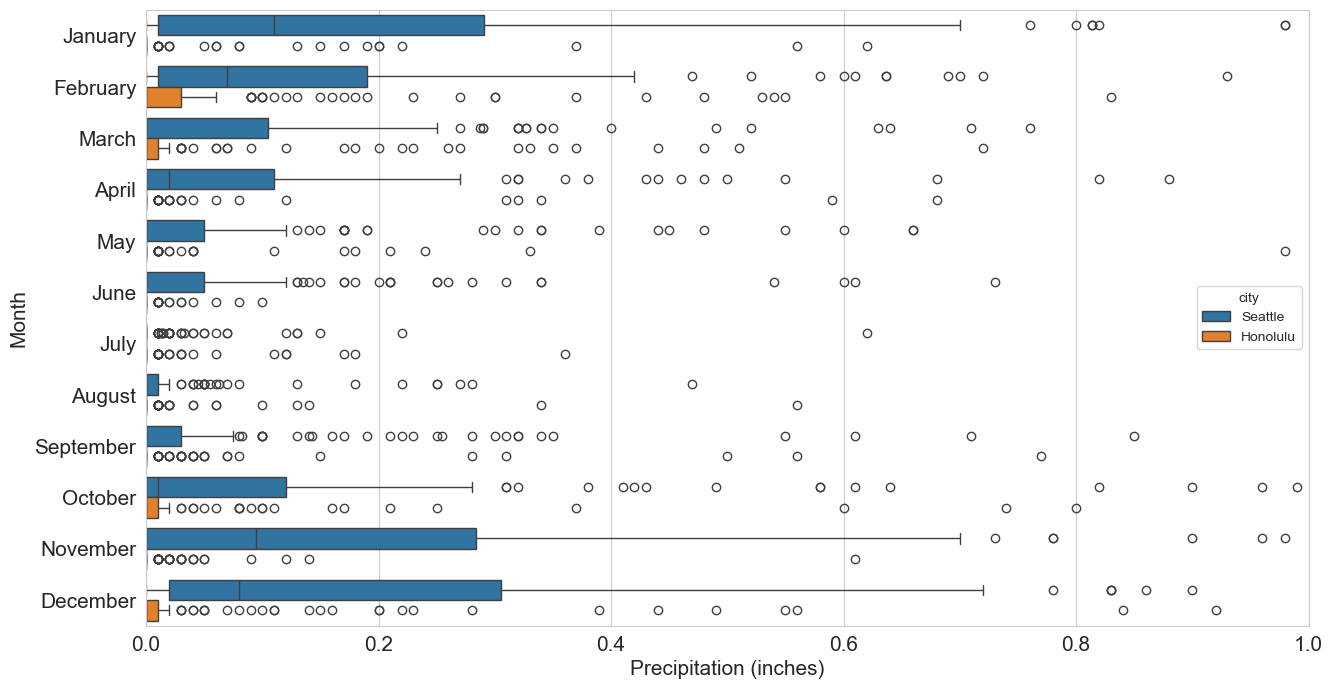

In [61]:
# Zoom in to show daily rain precipitation trends for each month (ignoring far out outliers)
plt.figure(figsize=(15, 8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)
plt.xlim(0,1)  # Adjust x-axis limit to zoom in
plt.show()


We can see that Honolulu is more consistent throughout the year, with occasional significant outliers in January, June, October, and December. Seattle shows that highest rain precipitation is in the winter months with significant variations during those months. With zoom in we can see that winter months have higher precipitation levels for both cities, with Seattle showing significant variation during those months.

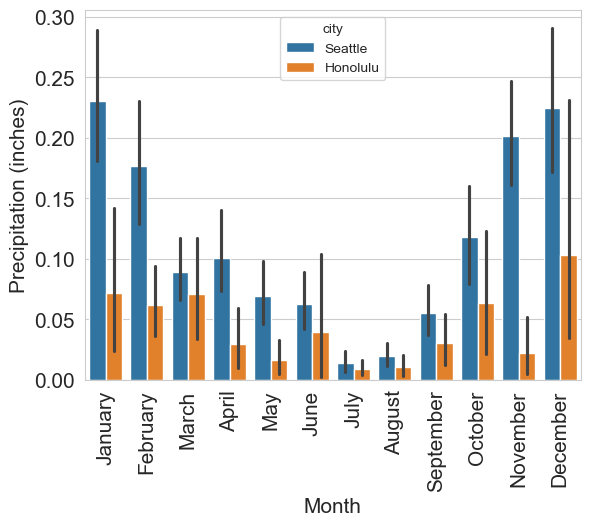

In [62]:
sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names, rotation=90)
plt.show()

Confirms our earlier observations with Seattle having high uncertainty in winter months and Honolulu being more consistent with February showing higher uncertainty.

### Analyzing number of days without rain precipitation


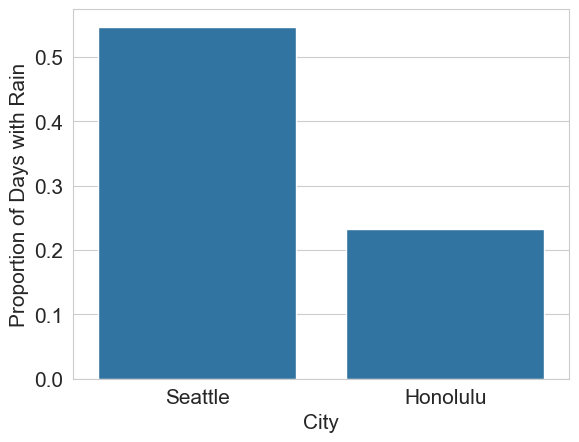

In [64]:
df['any_rain'] = df['precipitation'] > 0

sns.barplot(data=df, x='city',y='any_rain',errorbar=None)

plt.xlabel('City', fontsize=15)
plt.ylabel('Proportion of Days with Rain', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()


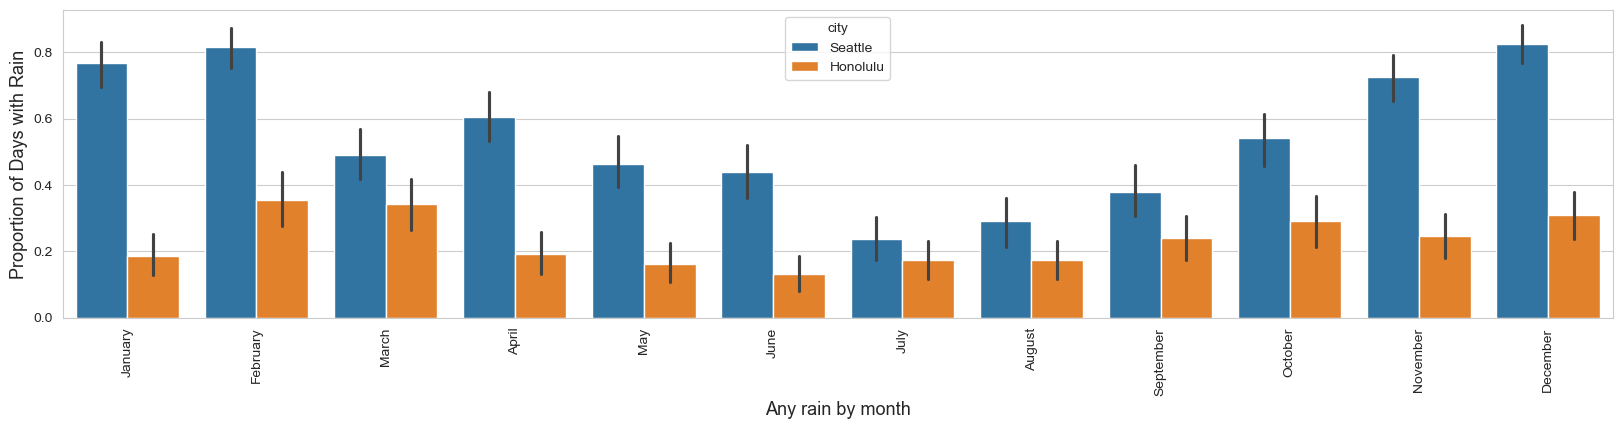

In [66]:
# Analyzing number of days without rain precipitation by month
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_rain', hue='city')

plt.xlabel("Any rain by month", fontsize=13)
plt.ylabel("Proportion of Days with Rain", fontsize=13)

plt.xticks(ticks=range(12), labels=month_names, rotation=90)
plt.show()